# Doğrusal Regresyon Modelleri
### Basit Doğrusal Regresyon
### Çoklu Doğrusal Regresyon
### Ridge Regreson
### Lasso Regresyon
### Elastic Net Regresyon

## Basit Doğrusal Regresyon (Simple Linear Regression)

#### Basit: 1 tnae bağımsız ve 1 bağımlı değişken demektir.
#### Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.
#### Modellemek, çeşitli kavramlar arasındaki ilişkileri belirli matematiksel formlara ifade etmek emektir.                                                                              Yi=b0+b1xi

#### Anakitle Modeli:  Y= Beta0+Beta1x+E(psilon)
#### Örneklem Moeli: Yi=b0+b1i+ei
#### Tahmin Modeli: yi(şapka)=b0+b1xi

#### Beta0: doğrunun y eksenini kestiği nokta 
#### Beta1 doğrunun eğimi
#### Epsilon= hata terimi
#### Biri artarsa iğeri de artar doğrusal olma sebebi

In [2]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
import pandas as pd
df=pd.read_csv("Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


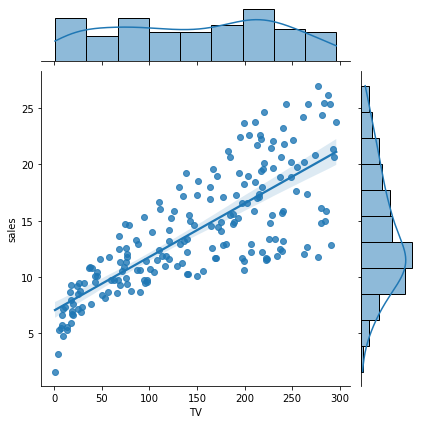

In [4]:
import seaborn as sns
sns.jointplot(x="TV", y="sales",data=df, kind="reg");

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
X=df[["TV"]]
X.head() #bağımsız değişken

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [7]:
y = df[["sales"]]
y.head() #bağımlı değişken

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [8]:
reg = LinearRegression()

In [9]:
model=reg.fit(X,y)

In [10]:
model

LinearRegression()

In [11]:
str(model)

'LinearRegression()'

In [12]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [13]:
model.intercept_#b0

array([7.03259355])

In [14]:
model.coef_#b1

array([[0.04753664]])

In [15]:
#rkare
model.score(X,y)
#modelin skoru

0.611875050850071

### BDR: TAHMİN

C:\Users\Monster\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


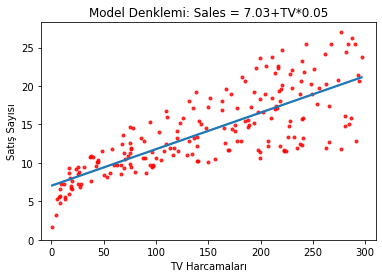

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.regplot(df["TV"], df["sales"],ci=None, scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi: Sales = 7.03+TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

sales= 7.03+0.05*TV

In [17]:
7.03+0.05*165 #tahmin alternatif: model.intercept_+model.coef_*165

15.280000000000001

In [18]:
model.predict([[165]])#tahmin et demek

array([[14.87613922]])

In [19]:
yeni_veri=[[5],[15],[30]]

In [20]:
model.predict(yeni_veri)

array([[7.27027675],
       [7.74564316],
       [8.45869276]])

## Artıklar ve Makine Öğrenmesindeki Önem
### MSE: Hata Kareler Ortalaması
### RMSE: Hata Kareler Ortalamasının Karekökü

In [21]:
y.head()#bağımlı değişken gerçek değerler

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [22]:
model.predict(X)[0:6]#tahmin edilen değerler

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [23]:
gercek_y= y[0:10]

In [24]:
tahmin_edilen_y=pd.DataFrame(model.predict(X)[0:10])

In [25]:
hatalar = pd.concat([gercek_y,tahmin_edilen_y], axis=1)

In [26]:
hatalar.columns=["gercek_y","tahmin_edilen_y"]
hatalar

,gercek_y,tahmin_edilen_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [27]:
hatalar["hata"]=hatalar["gercek_y"]-hatalar["tahmin_edilen_y"]

In [28]:
hatalar

,gercek_y,tahmin_edilen_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [29]:
hatalar["hata_kare"]=hatalar["hata"]**2

In [30]:
hatalar

,gercek_y,tahmin_edilen_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [31]:
import numpy as np
np.mean(hatalar["hata_kare"])

9.290350329638105

## Çoklu Doğrusal Regresyon (Multiple Linear Regression)

Temel amaç, bağımlı ve bağımsız değişkenler arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.

yi=beta0+beta1xi1+beta2xi2+beta3xi3+......+betajxij+...+betapxip+Ei
-Model içindeki bağımsız değişkenlerin etkilerini kontrol etmek için kullanılacak
-Hatalar normal dağılır.
-Hatalar birbirinden bağımsızdır ve aralarında otokorelasyon yoktur
-Her bir gözlem için hata terimleri varyansları sabittir
-Değişkenler ile ata terimi arasında ilişki yoktur
-Bağımsız değişkenler arasında çoklu doğrusal ilişki problemi yoktur.

### Regrensyon Modellerinin Avantaj ve Dezavantajları
-İyi anlaşılırsa diğer tüm ML ve DL konuları çok rahat kavranır
-Doğrusallık nedensellik youmları yapılabilmesini sağlar, bu durum aksiyoner ve stratejik modelleme imkanı verir.
-Değişkenlerin etki düzeyleri ve anlamlılıkları değerlendirilebilir
-Bağımlı değişkendeki değişkenliğin açıklanma başarısı ölçülebilir
-Model anlamlılığı değerlendirilebilir
-Varsayımları vardır
-Aykırı gözlemlere duyarlıdır.

## Çoklu doğrusal regresyon
### Model

In [32]:
#http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
import pandas as pd
df=pd.read_csv("Advertising.csv")
df=df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [33]:
X= df.drop('sales',axis=1)
y=df[["sales"]]
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [34]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


### Statsmodels ile Model Kurmak

In [35]:
import statsmodels.api as sm
lm = sm.OLS(y,X)

In [36]:
model = lm.fit()

In [37]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Fri, 18 Mar 2022   Prob (F-statistic):                   2.43e-171
Time:                        23:22:34   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### scikit learn ile model kurmak

In [38]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [39]:
model = lm.fit(X, y)

In [40]:
model.intercept_ #sabite erişme

array([2.93888937])

In [41]:
model.coef_ #bağımsız değişkenlerin kat sayı değerleri

array([[ 0.04576465,  0.18853002, -0.00103749]])

### ÇDR: TAHMİN

**sales = 2.94+TV+0.04+radio * 0.19-newspaper * 0.001

30 birim tv, 10 birim radio, 40 birim gazete

In [42]:
2.94 + 30 * 0.04 + 10 * 0.19 - 40 * 0.001

5.999999999999999

In [43]:
yeni_veri = [[30],[10],[40]]

In [44]:
yeni_veri = pd.DataFrame(yeni_veri).T#transpoz

In [45]:
yeni_veri

,0,1,2
0,30,10,40


In [46]:
model.predict(yeni_veri)#tahmin

array([[6.15562918]])

In [47]:
yeni_veri=[[300],[120],[400]]
yeni_veri=pd.DataFrame(yeni_veri).T

In [48]:
yeni_veri

,0,1,2
0,300,120,400


In [49]:
model.predict(yeni_veri)

array([[38.87688782]])

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
model.predict(X)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [52]:
MSE = mean_squared_error(y, model.predict(X))#hata kareler ortalaması
MSE

2.784126314510936

In [53]:
import numpy as np
RMSE = np.sqrt(MSE)
RMSE

1.6685701407225697

### ÇDR: MODEL TUNING (MODEL DOĞRULAMA)

In [54]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [55]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [56]:
#sınama seti
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size = 0.20, random_state = 1)

In [58]:
X_train.head()

,TV,radio,newspaper
108,13.1,0.4,25.6
107,90.4,0.3,23.2
189,18.7,12.1,23.4
14,204.1,32.9,46.0
56,7.3,28.1,41.4


In [59]:
X_test.head()

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [60]:
y_train.head()

,sales
108,5.3
107,8.7
189,6.7
14,19.0
56,5.5


In [61]:
y_test.head()

,sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6


In [62]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [63]:
#eğitim hatası
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.736902590147092

In [64]:
#test hatası
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

1.4113417558581582

#### K-katlı cv

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
cross_val_score(model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error")

array([-1.62375953, -3.81875608, -3.43828142, -2.27748673, -7.25325414,
       -1.88303708, -2.80517715, -3.68594486, -1.12810834, -3.96330989])

In [67]:
#cv rmse
np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv=10, scoring = "neg_mean_squared_error")))

1.7854163438661466

## Ridge Regresyon

Amaç hata kareler toplamını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmaktır.

* Aşırı öğrenmeye karşı dirençli
* Yanlıdır fakat varyansı düşüktür. (Bazen yanlı modelleri daha çok tercih ederiz)
* Çok fazla paremetre olduğunda EKK'ya göre daha iyidir.
* Çok boyutluluk lanetine karşı çözüm sunar
* Çoklu doğrusal bağlantı problemi olduğunda etkilidir.(bağımsız değişkenler arasında çoklu kolesyon)(bir değişkenin tasşıdığı bilginin neredeyse aynısını başka değişken de taşır)
* Tüm değişkenler ile model kurar. İlgisiz değişkenleri modelden çıkarmaz, katsayılarını sıfıra yaklaştırır.
* lambda kritik roldedir. İki terimin(formüldeki) göreceli etkilerini kontrol etmeyi sağlar
* lambda için iyi bir değer bulunması önemlidir. Bunun için CV yöntemi kullanılır

### lambda = ayar parametresi (kullanıcı tarafından verilir)
### beta'lar = bulunacak olan parametreler(veri setinde bulunur)
* lambdanın sıfır olduğu yer EKK'dır. HKT'yi minimum yapan lambda'yı arıyoruz
* lambda için belirli değerleri içeren bir küme seçilir ve her birisi için cross validatin test hatası hesaplanır
* en küçük cv'i veren lamnbda ayar parametresi olarak seçilir
* son olarak seçilen bu lambda ile model yeniden tüm gözlemlere fit edilir.

In [68]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

veri seti

In [69]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) #one-hot

y = df["Salary"]#bağımlı değişken
#X_ = df.dropna(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

remove = ['Salary', 'League', 'Division', 'NewLeague'] #kategorik değişkenler, bağımsız değişkenler
X_= df[df.columns.difference(remove)]

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
              
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                   random_state=42)

In [70]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [71]:
df.shape

(263, 20)

In [72]:
ridge_model = Ridge(alpha =5).fit(X_train, y_train)#alpha kaysayıların başında duran parametre

In [73]:
ridge_model

Ridge(alpha=5)

In [74]:
ridge_model.coef_

array([  0.2646614 ,  -1.81040449,  -0.13033385,  -0.25425913,
        -0.71109275,   0.77083457,   1.81452   ,  -0.6768975 ,
        -0.36947934,   8.87872786,   7.12487047,   0.26211894,
        -2.01162162,  -3.31713488,   5.40691525,   7.25828404,
        76.19519054, -90.15523668, -16.00453535])

In [75]:
ridge_model.intercept_ #sabit kat sayı

-3.4251968687165117

In [78]:
np.linspace(10,-2,100)

array([10.        ,  9.87878788,  9.75757576,  9.63636364,  9.51515152,
        9.39393939,  9.27272727,  9.15151515,  9.03030303,  8.90909091,
        8.78787879,  8.66666667,  8.54545455,  8.42424242,  8.3030303 ,
        8.18181818,  8.06060606,  7.93939394,  7.81818182,  7.6969697 ,
        7.57575758,  7.45454545,  7.33333333,  7.21212121,  7.09090909,
        6.96969697,  6.84848485,  6.72727273,  6.60606061,  6.48484848,
        6.36363636,  6.24242424,  6.12121212,  6.        ,  5.87878788,
        5.75757576,  5.63636364,  5.51515152,  5.39393939,  5.27272727,
        5.15151515,  5.03030303,  4.90909091,  4.78787879,  4.66666667,
        4.54545455,  4.42424242,  4.3030303 ,  4.18181818,  4.06060606,
        3.93939394,  3.81818182,  3.6969697 ,  3.57575758,  3.45454545,
        3.33333333,  3.21212121,  3.09090909,  2.96969697,  2.84848485,
        2.72727273,  2.60606061,  2.48484848,  2.36363636,  2.24242424,
        2.12121212,  2.        ,  1.87878788,  1.75757576,  1.63

In [79]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

In [80]:
lambdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [81]:
#amaç:bir yöntemle oluşturmuş olduğumuz lambda değerlerine karşı kay sayıların nasıl değişeceğine bakmak

In [82]:
ridge_model = Ridge()
katsayilar=[]

for i in lambdalar:
    ridge_model.set_params(alpha=i)#i lambda içinde gezer ve hepsini rigde model nesnesinin alpha parametresi olarak atar
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_) 

In [83]:
katsayilar

[array([ 1.54040667e-04,  1.08705828e-03,  1.78978518e-02,  5.28448603e-03,
         6.33684784e-04,  2.70578331e-03,  2.78574434e-03,  1.95710128e-03,
         2.97933111e-06,  3.59972026e-04,  5.52181027e-05,  1.87423190e-03,
         1.96696069e-04,  1.92813177e-04,  1.59478501e-04,  2.78199599e-05,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 2.00411447e-04,  1.41677983e-03,  2.22675231e-02,  6.58971645e-03,
         7.96723486e-04,  3.38849662e-03,  3.48283639e-03,  2.44474193e-03,
         4.05879985e-06,  4.69820454e-04,  7.18242293e-05,  2.46055074e-03,
         2.55763476e-04,  2.52218183e-04,  2.07728851e-04,  3.41731833e-05,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 2.59998767e-04,  1.84180994e-03,  2.73092348e-02,  8.10613246e-03,
         9.90615632e-04,  4.19154557e-03,  4.29892819e-03,  3.01420413e-03,
         5.54696646e-06,  6.11797854e-04,  9.31516430e-05,  3.22598807e-03,
         3.31574150e-04,  3.29313865e-04, 

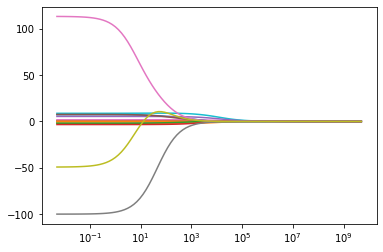

In [84]:
ax = plt.gca()
ax.plot(lambdalar,katsayilar)
ax.set_xscale("log") #farklı renkler farklı katsayıların değerleridir

## Tahmin

In [96]:
ridge_model = Ridge().fit(X_train, y_train) #model kurmak. Train seti üzerine 

In [97]:
y_pred = ridge_model.predict(X_train) #train seti için bir tahmin etme işlemi train setinin bağımsız değişkenleri kullanılarak

In [87]:
y_pred[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [88]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [98]:
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE #train hatası valdie edilmemiş hata kareler ortalaması. ilkel hata hesaplama
#tahmin edilen bağımlı ve gerçek bağımlı değişkenleri karşılaştırdık ve traine yönelik olarak hata bulduk

289.34470696006565

In [93]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv =10, scoring = "neg_mean_squared_error")))
#hata kareler ortalamasının karekökü. bu hata oranı daha doğru

351.39315856063223

In [99]:
#test hatası 
y_pred = ridge_model.predict(X_test)#test setinin içindeki bağımsızları kullanarak bağımlı değişkeni tahmin etme
#tahmin iştemi test setine göre yapıldı. Test setinde başarı deneme.
#Test setinde x bağımsız değişkenlerini kullanarak test setinin bağımlı değişkenlerini tahmin ettik

In [102]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE
#test setinin tahmin değerleri ve test setinin y bağımlı değişken gerçek değerleri var karşılaştırdık
#train ile ilgilenmeyeceğiz. test hatasına ilişkin bütün modeller için rmse değerlerini hesaplayıp modellerin birbirine göre performansını 
#test hatasına göre hesaplayacağız

356.8082905730243

In [103]:
#bir model kurduk, kurduğumuz modeli parametre optimizasyonu yapmadan ön tanımlı değeri üzerinden kurduk.

### Model Tuning

Neden Model Tuning?

In [105]:
ridge_model = Ridge(1).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

356.8082905730243

In [108]:
np.random.randint(0,1000,100)#0 ve 1000 arasında 100 sayı

array([572, 841, 824, 735, 495, 706,  47, 331, 337, 596,  55, 996,  14,
        78, 912, 340, 836,  51, 579, 687, 310,   9, 931, 112, 263, 457,
       111, 702, 218, 209, 624, 112, 578, 636, 474, 527, 301, 871, 132,
       860, 922, 819, 130, 316, 606,  53, 817, 761, 763, 949, 741, 721,
       174, 315, 768, 836, 305, 923, 968, 374, 502, 430, 319, 208, 932,
       292, 688, 245, 598, 812, 697, 764, 669, 863, 231, 945, 197,  44,
        53, 490, 648, 644, 696, 775, 253, 568, 500, 358, 987, 490, 613,
       472, 791, 953, 697, 661, 472, 765,  55, 585])

In [111]:
lambdalar1 = np.random.randint(0,1000,100)

In [112]:
lambdalar2= 10**np.linspace(10,-2,100)*0.5

In [114]:
ridgecv = RidgeCV(alphas = lambdalar2, scoring = "neg_mean_squared_error", cv =10, normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [115]:
ridgecv.alpha_ #optimum parametre

0.7599555414764666

In [116]:
#final modeli

In [117]:
ridge_tuned = Ridge(alpha= ridgecv.alpha_).fit(X_train, y_train)

In [130]:
y_pred = ridge_tuned.predict(X_test)#test setinin bağımsız değişkenlerini kullan, test setinin bağmılı değişkenini tahmin et
np.sqrt(mean_squared_error(y_test, y_pred))#lambdalar2

356.52937362973654

In [124]:
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv =10, normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([723, 959, 625, 157, 394, 719, 194, 556, 110,  71, 165,  96, 121,
       935, 718, 650, 885, 836, 227, 275, 188, 892, 797, 231, 115, 103,
       989, 503, 875, 994, 541, 182, 790, 870, 512, 492, 789, 519, 116,
       434, 890, 678, 220, 668, 815, 802, 535, 117, 442, 212, 640, 784,
       101, 329,  87, 945, 128, 394, 844, 266, 999, 755, 496, 296, 823,
       281, 513,  93, 106, 910, 441, 573, 499, 661, 514, 114, 728, 300,
       735, 870, 758, 374, 312, 374, 415, 103, 159, 291,   3, 725, 266,
       553, 375, 666, 553, 415, 440, 697, 821, 995]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [127]:
ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [129]:
y_pred = ridge_tuned.predict(X_test)#test setinin bağımsız değişkenlerini kullan, test setinin bağmılı değişkenini tahmin et
np.sqrt(mean_squared_error(y_test, y_pred))#lambdalar1

356.52937362973654

# Lasso Regresyon 

Amaç: Hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.
Lasso regresyon için L1 yöntemi denir.
Ridge regresyon için l2 yöntemi denir.

* Ridge regresyonla ilgili-ilgisiz tüm değişkenleri modelde bırakma dezavantajını gidermek için önerilmiştir.
* Lasso'da katsayıları sıfıra yaklaştırır.
* Fakat L1 normu lambda yeteri kadar büyük olduğunda bazı kaysayıları sıfır yapar. Böylece değişkenseçimi yapmış olur.
* Lambda'nın doğr seçilmesi çok önemlidir, burada da CV kullanılır.
* Ridge ve Lasso yöntemleri birbirinden üstün değildir.
* Lambda'nın sıfır olduğu yer EKK'dir. HKT'yi minimum yapan lambda'yı arıyoruz.
* LAmbda için belirli değerleri içeren bir küme seçilir ve her birisi için cros validation test hatası hesaplanır.
* En küçük cross validation'ı veren lambda ayar parametresi olarak seçilir.
* Son olarak seçilen bu lambda ile model yeniden tük gözlemlere fit edilir.

### Model

In [133]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

Veri Seti

In [135]:
df = pd.read_csv("Hitters.csv")

df = df.dropna()

dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) #one-hot

y = df["Salary"]#bağımlı değişken

#X_ = df.dropna(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
remove = ['Salary', 'League', 'Division', 'NewLeague'] #kategorik değişkenler, bağımsız değişkenler
X_= df[df.columns.difference(remove)]

X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
              
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.25,
                                                   random_state=42)

In [136]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [138]:
df.shape

(263, 20)

In [139]:
lasso_model = Lasso().fit(X_train, y_train)

C:\Users\Monster\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8243553.231327176, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(


In [140]:
lasso_model

Lasso()

In [141]:
lasso_model.intercept_#sabit

-4.613111914080946

In [142]:
lasso_model.coef_#katsayılar

array([  0.27072833,  -1.75246934,  -0.15710705,  -0.10755392,
        -0.45853486,   0.68246825,   1.71198639,  -0.64852668,
        -0.44225465,   8.61981045,   6.80381016,   0.25971319,
        -1.96486848,  -3.08103337,   5.32272056,   8.04504233,
        84.67492024, -96.04940618, -20.9038947 ])

In [143]:
#farklı lambda değerlerine karşılık katsayılar

In [156]:
lasso = Lasso()
coefs= []
alphas = np.random.randint(0,100000,10)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

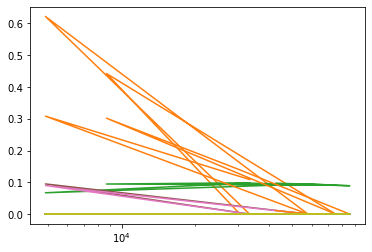

In [157]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

In [160]:
lasso = Lasso()
coefs= []
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

C:\Users\Monster\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41953.60888843797, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\Monster\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4137.105885792524, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\Monster\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4256571.461102678, tolerance: 3898.686956380658
  model = cd_fast.enet_coordinate_descent(
C:\Users\Monster\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Convergen

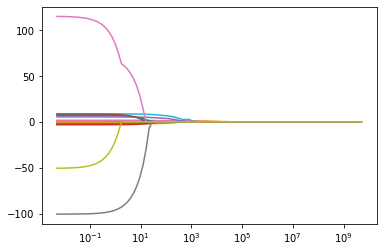

In [159]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")

### Tahmin